# ¿Qué vende un coche?

Se estudiarán los datos recopilados durante años sobre anuncios publicados en el sitio web de Crankshaft List para con ello determinar qué factores influyen en el precio de un vehículo.

**Tabla de contenidos**<a id='toc0_'></a>    
- [Inicialización](#toc1_)    
  - [Carga de datos](#toc1_1_)    
  - [Exploración de los datos](#toc1_2_)    
  - [Conclusiones y siguientes pasos](#toc1_3_)    
- [Tratamiento de los valores ausentes](#toc2_)    
  - [**`model_year`**](#toc2_1_)    
  - [**`cylinders`**](#toc2_2_)    
  - [**`odometer`**](#toc2_3_)    
  - [**`paint_color`**](#toc2_4_)    
  - [**`is_4wd`**](#toc2_5_)    
- [Transformación de tipos de datos](#toc3_)    
- [Enriquecimiento de datos](#toc4_)    
- [Comprobación final de datos limpios](#toc5_)    
- [Estudio de parámetros principales](#toc6_)    
- [Estudio y tratamiento de valores atípicos](#toc7_)    
- [Estudio de parámetros principales sin valores atípicos](#toc8_)    
- [Periodo de colocación de los anuncios](#toc9_)    
- [Precio promedio por cada tipo de vehículo](#toc10_)    
- [Factores de precio](#toc11_)    
  - [**`SUV`**](#toc11_1_)    
  - [**`sedan`**](#toc11_2_)    
- [Conclusión general](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Inicialización](#toc0_)

In [10]:
# Se importan las librerías y módulos requeridos.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### <a id='toc1_1_'></a>[Carga de datos](#toc0_)

In [12]:
# Se lee el archivo de datos
try: 
    df = pd.read_csv('./datasets/vehicles_us.csv')
except:
    df = pd.read_csv('/vehicles_us.csv')

### <a id='toc1_2_'></a>[Exploración de los datos](#toc0_)

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [13]:
# Información general/resumida sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [14]:
# Muestra de datos
df.sort_values('model_year', ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
32112,24200,2019.0,nissan frontier crew cab sv,good,6.0,gas,11034.0,other,pickup,blue,1.0,2019-02-10,5
17055,45998,2019.0,chevrolet suburban,excellent,8.0,gas,27032.0,automatic,SUV,NaN,1.0,2019-01-10,29
38271,36347,2019.0,chevrolet silverado 1500,new,8.0,gas,5.0,automatic,truck,blue,1.0,2019-03-03,21
21120,11900,2019.0,ford escape,excellent,4.0,gas,7000.0,automatic,SUV,NaN,NaN,2019-03-23,44
21138,48780,2019.0,gmc sierra 1500,excellent,NaN,gas,4134.0,automatic,truck,black,1.0,2019-02-08,74
38293,56504,2019.0,chevrolet silverado 2500hd,new,8.0,diesel,7.0,automatic,truck,white,1.0,2019-04-02,12
21195,49900,2019.0,chevrolet silverado 1500,like new,8.0,gas,2360.0,automatic,pickup,NaN,1.0,2019-03-10,65
9279,46267,2019.0,ford f-250,like new,8.0,diesel,1440.0,automatic,truck,grey,1.0,2019-02-03,21
46633,29995,2019.0,ford f-150,excellent,8.0,gas,NaN,automatic,truck,blue,1.0,2019-04-02,55
46695,21800,2019.0,nissan frontier crew cab sv,good,6.0,gas,11745.0,other,pickup,white,NaN,2019-03-12,35


**Observaciones:**

- Tenemos valores ausentes en cinco columnas: `model_year`, `cylinders`, `odmometer`, `paint_color` y `is_4wd`. Los valores ausentes de `model_year`, `cylinders`, `odmometer` y `paint_color` pueden deberse a que la información se registró de forma incompleta. En cambio, los valores ausentes de `is_4wd` puede asociarse con que el vehículo no es 4wd.  
- La columna `model_year` debería estar representada como número entero. 
- La columna `date_posted` no tiene formato datetime

### <a id='toc1_3_'></a>[Conclusiones y siguientes pasos](#toc0_)

- Se deben abordar los valores ausentes decidiendo si asignar un valor o categoría representativa o eliminándolos por completo. 
- Se deben cambiar los formatos de algunas columnas.

## <a id='toc2_'></a>[Tratamiento de los valores ausentes](#toc0_)

A continuación se estudian los valores ausentes por cada columna.

### <a id='toc2_1_'></a>[**`model_year`**](#toc0_)

Examino si los registros de la columna tienen características en común:

In [15]:
# Filas con valores ausentes de model_year
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


Los valores ausentes podrían tener un origen completamente aleatorio. Por lo tanto, se crea una función que reemplace los valores ausentes por la mediana según las columnas `model` y `condition`.

In [16]:
# Función para asignar la mediana según model y condition a las filas con valores ausentes
def fill_model_year(df):
    medians_by_group = df.groupby(['model', 'condition'])['model_year'].median().reset_index()
    df = pd.merge(df, medians_by_group, on=['model', 'condition'], how='left', suffixes=('', '_median'))
    df['model_year'] = df['model_year'].fillna(df['model_year_median'])
    df = df.drop('model_year_median', axis=1)
    return df

In [17]:
# Se aplica la función y se comprueba el resultado
df = fill_model_year(df)
df.isna().sum()

price               0
model_year          6
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Existen aún valores ausentes en la columna, probablemente porque no existe una mediana para aquellos pares `model`-`condition`.

In [18]:
# Se muestran los valores ausentes remanentes
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,NaN,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,NaN,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


Aún quedan valores ausentes en la columna. Al ser de una cantidad muy reducida con respecto a todo el dataset, se los elimina para que no interfieran con el análisis posterior.

In [19]:
df = df.dropna(subset=['model_year'])

Ya no existen valores ausentes en la columna. 

### <a id='toc2_2_'></a>[**`cylinders`**](#toc0_)

Examino si los registros de la columna tienen características en común:

In [20]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


Nuevamente, los valores ausentes podrían tener un origen completamente aleatorio. Por lo tanto, se crea una función que reemplace los valores ausentes por la moda según las columnas `model` y `cylinders`. Se utiliza la moda ya que el rango de valores de de `cylinders` es pequeño y compuesto de valores discretos.

In [21]:
# Función para asignar la mediana según model y cylinder a las filas con valores ausentes
def fill_cylinders(df):
    modes_by_group = df.groupby('model')['cylinders'].agg(pd.Series.mode).reset_index()
    df = pd.merge(df, modes_by_group, on='model', how='left', suffixes=('', '_mode'))
    df['cylinders'] = df['cylinders'].fillna(df['cylinders_mode'])
    df = df.drop('cylinders_mode', axis=1)
    return df

In [22]:
# Se aplica la función y se comprueba el resultado
df = fill_cylinders(df)
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7891
transmission        0
type                0
paint_color      9266
is_4wd          25951
date_posted         0
days_listed         0
dtype: int64

In [23]:
df['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

Ya no existen valores ausentes en la columna. 

### <a id='toc2_3_'></a>[**`odometer`**](#toc0_)

Se crea una función que reemplace los valores ausentes por la mediana según las columnas `model_year` y `condition`.

In [24]:
# Función para asignar la mediana según model_year y condition a las filas con valores ausentes
def fill_odometer(df):
    medians_by_group = df.groupby(['model_year', 'condition'])['odometer'].median().reset_index()
    df = pd.merge(df, medians_by_group, on=['model_year', 'condition'], how='left', suffixes=('', '_median'))
    df['odometer'] = df['odometer'].fillna(df['odometer_median'])
    df = df.drop('odometer_median', axis=1)
    return df

In [25]:
# Se comprueba el resultado
df = fill_odometer(df)
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            7
transmission        0
type                0
paint_color      9266
is_4wd          25951
date_posted         0
days_listed         0
dtype: int64

In [26]:
# Se muestran los valores ausentes remanentes
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21418,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18
28004,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,NaN,NaN,2018-11-03,41
31801,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,NaN,2019-03-31,46
33252,4500,1963.0,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-17,38
33902,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25
45689,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59
46906,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,NaN,2018-11-08,23


Aún quedan valores ausentes en la columna. Al ser de una cantidad muy reducida con respecto a todo el dataset, se los elimina para que no interfieran con el análisis posterior.

In [27]:
df = df.dropna(subset=['odometer'])

Ya no existen valores ausentes en la columna. 

### <a id='toc2_4_'></a>[**`paint_color`**](#toc0_)

No existe suficiente información para reemplazar estos valores. Se elige no eliminarlos porque contienen información como el precio y el millaje que es útil para el análisis posterior. Se reemplazan los valores ausentes por "unknown".

In [28]:
# Reemplazo los valores ausentes por la string "unknown"
df['paint_color'] = df['paint_color'].fillna('unknown')
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25944
date_posted         0
days_listed         0
dtype: int64

### <a id='toc2_5_'></a>[**`is_4wd`**](#toc0_)

Los valores ausentes de esta columna podrían indicar que el vehículo no es 4wd. Se reemplazan estos valores por 0 para obtener una columna con valores numéricos donde 1 corresponde a que el vehículo es 4wd y 0 corresponden a que no es. 

In [29]:
# Convierto NaN a 0 y toda la columna a int
df['is_4wd'] = df['is_4wd'].where(df['is_4wd']==1, 0).astype(int)
df['is_4wd'].unique()

array([1, 0])

In [30]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## <a id='toc3_'></a>[Transformación de tipos de datos](#toc0_)

Convierto `price` a float porque es común que este tipo de variable se exprese de esta forma. Por el mismo motivo convierto `model_year` a int. Finalmente, convierto `date_posted` a datetime.

In [31]:
#Convierto precio a float 
df['price'] = df['price'].astype(float)
#Convierto  model_year y cilinders a entero
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
# Transformo la columna `date_posted` a formate datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51512 entries, 0 to 51518
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51512 non-null  float64       
 1   model_year    51512 non-null  int32         
 2   model         51512 non-null  object        
 3   condition     51512 non-null  object        
 4   cylinders     51512 non-null  int32         
 5   fuel          51512 non-null  object        
 6   odometer      51512 non-null  float64       
 7   transmission  51512 non-null  object        
 8   type          51512 non-null  object        
 9   paint_color   51512 non-null  object        
 10  is_4wd        51512 non-null  int32         
 11  date_posted   51512 non-null  datetime64[ns]
 12  days_listed   51512 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
memory usage: 4.9+ MB


## <a id='toc4_'></a>[Enriquecimiento de datos](#toc0_)

Se agregan factores adicionales a los datos para facilitar el análisis.

In [32]:
# Se agregan columnas de día, mes y año de cuándo se colocó el anuncio

df['ad_weekday'] = df['date_posted'].dt.weekday
df['ad_month'] = df['date_posted'].dt.month
df['ad_year'] = df['date_posted'].dt.year


df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500.0,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019


In [33]:
#  Años del vehículo cuando el anuncio se colocó
df['vehicle_age'] = df['ad_year'] - df['model_year']
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,vehicle_age
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6
3,1500.0,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2


In [34]:
# Millaje promedio del vehículo por año
# para los casos donde vehicle_age es igual a cero, el valor de mean_mileage pasa a ser directamente el valor de odometer

df['mean_mileage'] = np.where(df['vehicle_age'] == 0, df['odometer'], df['odometer'] / df['vehicle_age'])
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,vehicle_age,mean_mileage
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10,8870.500000
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500.0,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11750.000000
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


In [35]:
# Se asigna un valor numérico a cada categoría de la columna condition y se añade como columna
condition_ranking = {'salvage':1,
                     'fair':2,
                     'good':3,
                     'excellent':4,
                     'like new':5,
                     'new':6
    }
df['condition_ranking'] = df['condition'].map(condition_ranking)

# Se comprueba el resultado

df.loc[:,['condition','condition_ranking']].head(10)

,condition,condition_ranking
0,good,3
1,good,3
2,like new,5
3,fair,2
4,excellent,4
5,excellent,4
6,excellent,4
7,excellent,4
8,excellent,4
9,excellent,4


## <a id='toc5_'></a>[Comprobación final de datos limpios](#toc0_)

Se comprueban los datos una vez más previo al análisis.

In [36]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51512 entries, 0 to 51518
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51512 non-null  float64       
 1   model_year         51512 non-null  int32         
 2   model              51512 non-null  object        
 3   condition          51512 non-null  object        
 4   cylinders          51512 non-null  int32         
 5   fuel               51512 non-null  object        
 6   odometer           51512 non-null  float64       
 7   transmission       51512 non-null  object        
 8   type               51512 non-null  object        
 9   paint_color        51512 non-null  object        
 10  is_4wd             51512 non-null  int32         
 11  date_posted        51512 non-null  datetime64[ns]
 12  days_listed        51512 non-null  int64         
 13  ad_weekday         51512 non-null  int64         
 14  ad_mon

In [37]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,vehicle_age,mean_mileage,condition_ranking
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714,3
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10,8870.500000,3
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333,5
3,1500.0,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11750.000000,2
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000,4


## <a id='toc6_'></a>[Estudio de parámetros principales](#toc0_)


Se estudian los siguientes parámetros:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Condición

Se grafican los parámetros mediante un histograma y un gráfico de caja para estudiar su distribución e identificar valores extremos.

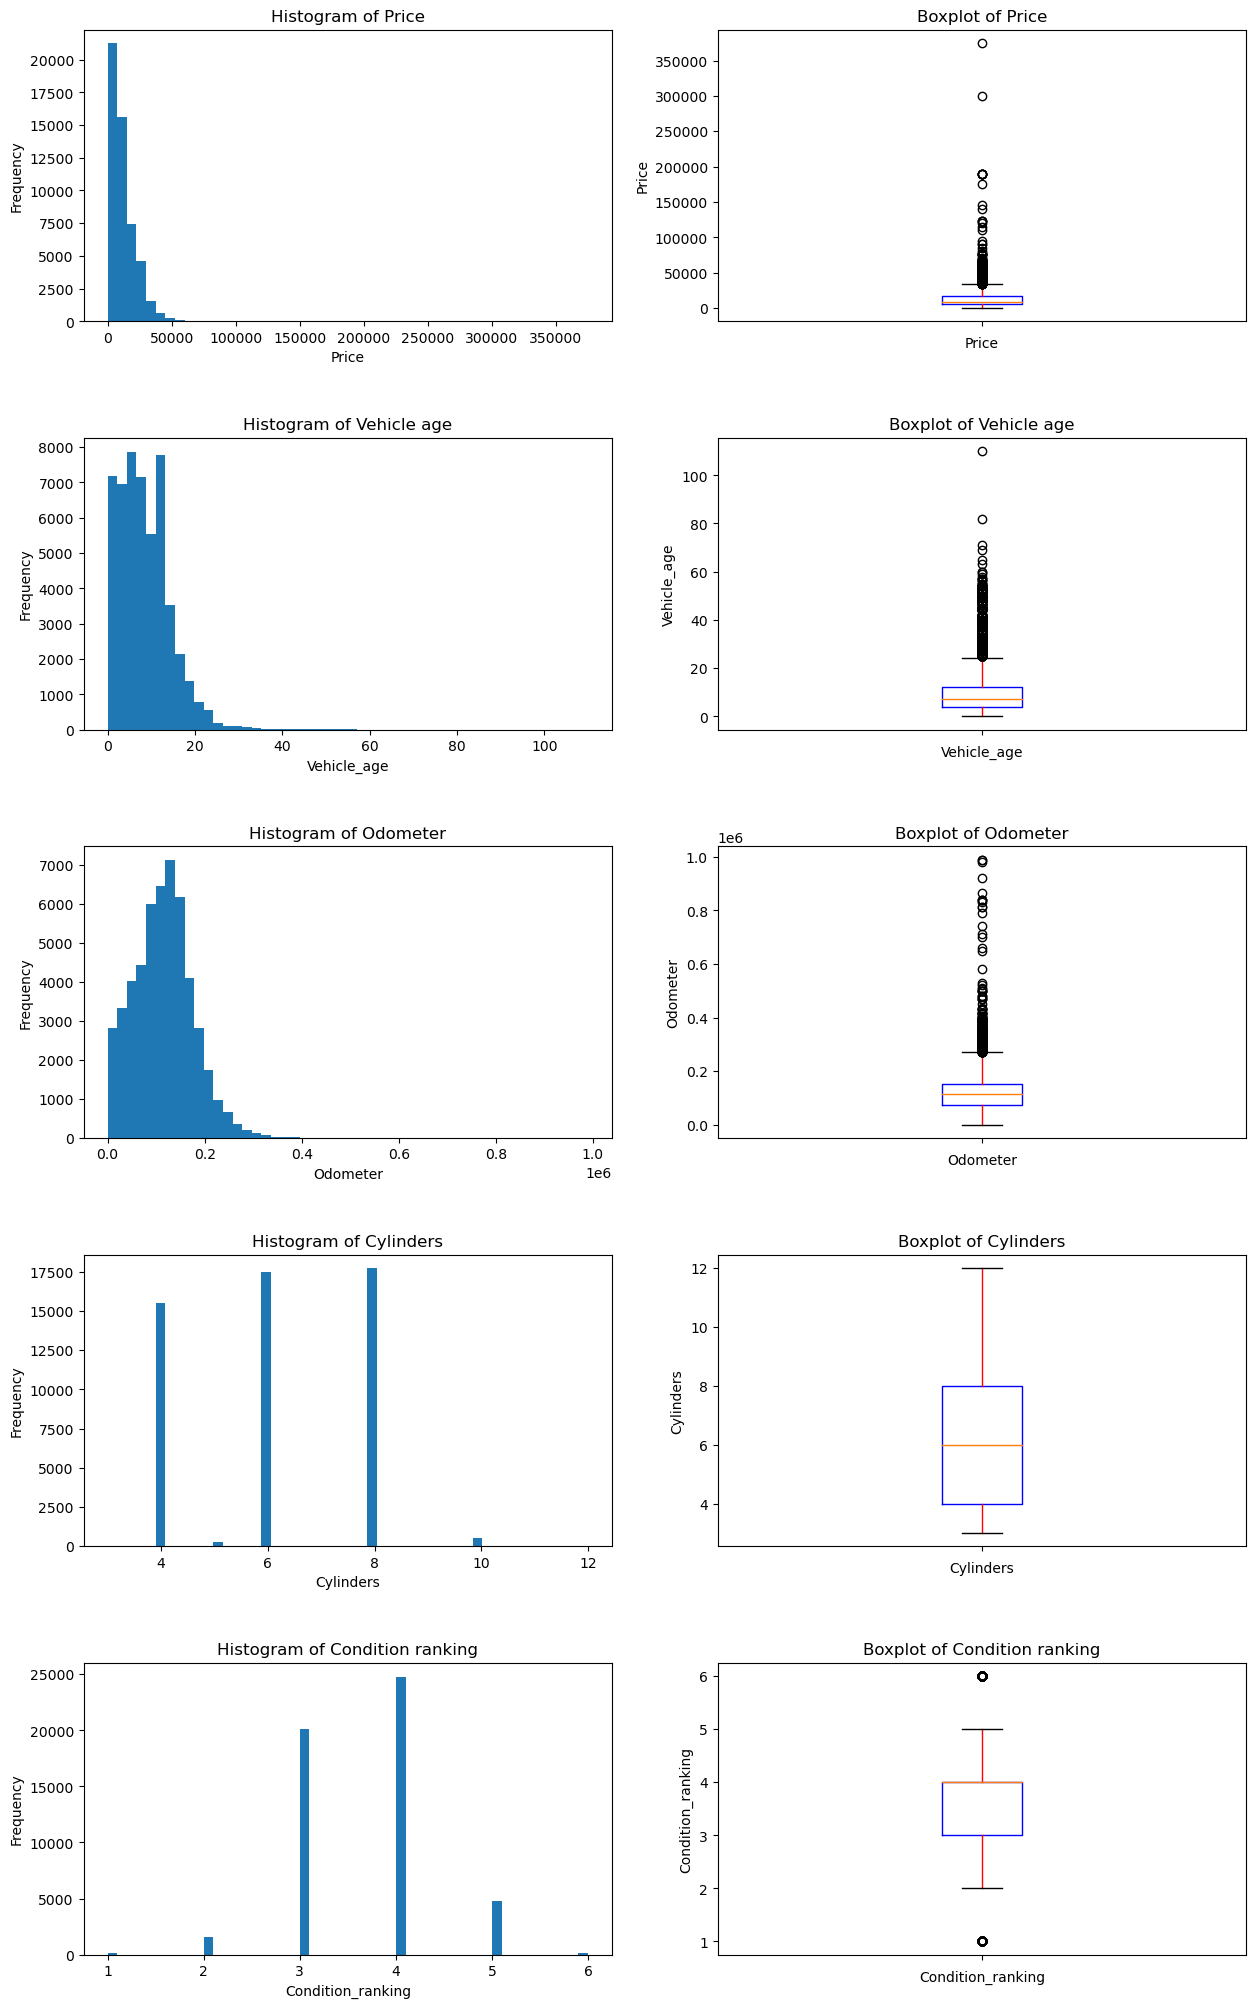

Lower whiskers: [1.0, 0.0, 0.0, 3.0, 2.0]
Upper whiskers: [34555.0, 24.0, 271175.0, 12.0, 5.0]


In [38]:
columns = ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition_ranking']

# Creo la matriz de gráficos
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, 25))

# Variables para almacenar los límites de los boxplots para su uso posterior
lower_whiskers = []
upper_whiskers = []

# Itero sobre las columnas y añado los gráficos a la matriz
for i, column in enumerate(columns):
    # Histograma en la primera columna
    axes[i, 0].hist(df[column], bins=50)
    axes[i, 0].set_xlabel(column.capitalize())
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].set_title(f"Histogram of {column.capitalize().replace('_',' ')}")

    # Gráfico de caja en la segunda columna
    boxplot = axes[i, 1].boxplot(df[column], boxprops={'color':'blue'}, whiskerprops={'color':'red'})
    axes[i, 1].set_ylabel(column.capitalize())
    axes[i, 1].set_title(f"Boxplot of {column.capitalize().replace('_',' ')}")
    axes[i, 1].set_xticklabels([])
    axes[i, 1].set_xlabel(column.capitalize())

    # Guardo los límites de los whiskers en listas
    lower_whiskers.append(boxplot['whiskers'][0].get_ydata()[1])
    upper_whiskers.append(boxplot['whiskers'][1].get_ydata()[1])


plt.subplots_adjust(hspace=0.4)


plt.show()

# Imprimo los límites de los whiskers de cada gráfico de caja
print("Lower whiskers:", lower_whiskers)
print("Upper whiskers:", upper_whiskers)


In [39]:
df.loc[:,['price','vehicle_age', 'odometer']].describe()

,price,vehicle_age,odometer
count,51512.000000,51512.000000,51512.000000
mean,12131.669514,8.515724,115218.970434
std,10038.743687,6.108029,62227.789056
min,1.000000,0.000000,0.000000
25%,5000.000000,4.000000,73034.000000
50%,9000.000000,7.000000,114671.000000
75%,16836.000000,12.000000,152381.000000
max,375000.000000,110.000000,990000.000000


Los datos de `price`, `vehicle_age` y `odomoter` presentan una media mayor a su mediana, lo que indica que tienen una distribución sesgada a la derecha. Por su desviación estándar, estas columnas tienen una alta variabilidad. También se identifican valores extremos altos en los datos.

Especificamente, podemos decir lo siguiente:
- La mayoría de vehículos tienen precios entre 5000.00 y 16 827.00. Adicionalmente, el valor mínimo de 1 y la alta frecuencia de datos en el primer intervalo indica que existen valores de precio muy bajos que podrían no ser consistentes con este tipo de variable. Mientras, los valores mínimos de las otras columnas, `vehicle_age` y `odometer`, podrían indicar que el vehículo es nuevo o que no ha tenido ningún recorrido, respectivamente. 
- La mayoría de vehículos tienen una edad al momento de la publicación del anuncio de entre 4 y 12 años. 
- La mayoría de vehículos tienen un millaje de entre 73 030.00 y 152 381.00.

Con respecto a los valores de `cylinders`, y `condition_ranking`, su distribución se organiza en un conjunto pequeño de valores discretos, por lo que no existe una alta variabilidad en los datos y no sigue una distribución como la de las columnas descritas anteriormente. En particular, el gráfico de caja de `condition_ranking` muestra valores extremos pero no se los tomará en consideración porque el rango de datos es pequeño. A partir de los gráficos también se conoce que:
- La mayoría de vehículos tienen entre 4 y 8 cilindros.
- La mayoría de vehículos tiene una condición de 4 y le sigue la condición 3, correspondientes a "like new" y "excellent" respectivamente. 
- No existen valores atípicos en las dos variables.


## <a id='toc7_'></a>[Estudio y tratamiento de valores atípicos](#toc0_)

Se eliminan los valores atípicos del dataset aplicando un filtro según los límites superiores y inferiores de los gráficos de caja de las columnas `price`, `vehicle_age` y `odometer`.

In [40]:
columns_with_outliers = ['price', 'vehicle_age', 'odometer']

# Filtro el dataset en base a las listas que formé antes

#lower_whiskers = [1.0, 0.0, 0.0, 3.0, 1.0]
#upper_whiskers = [52344.0, 36.0, 390000.0, 12.0, 6.0]

#itero sobre la lista de columnas con outliers, siguen el mismo orden que las lístas de límites

df_filtered = df.copy()

for i, column in enumerate(columns_with_outliers):
    df_filtered = df_filtered[(df_filtered[column] >= lower_whiskers[i]) & (df_filtered[column] <= upper_whiskers[i])]
    
# Compruebo imprimiendo las dimensiones de los datasets
print(f'Dataset original: {df.shape}')
print(f'Dataset filtrado: {df_filtered.shape}')

Dataset original: (51512, 19)
Dataset filtrado: (48538, 19)


## <a id='toc8_'></a>[Estudio de parámetros principales sin valores atípicos](#toc0_)

Se estudia el dataset filtrado.

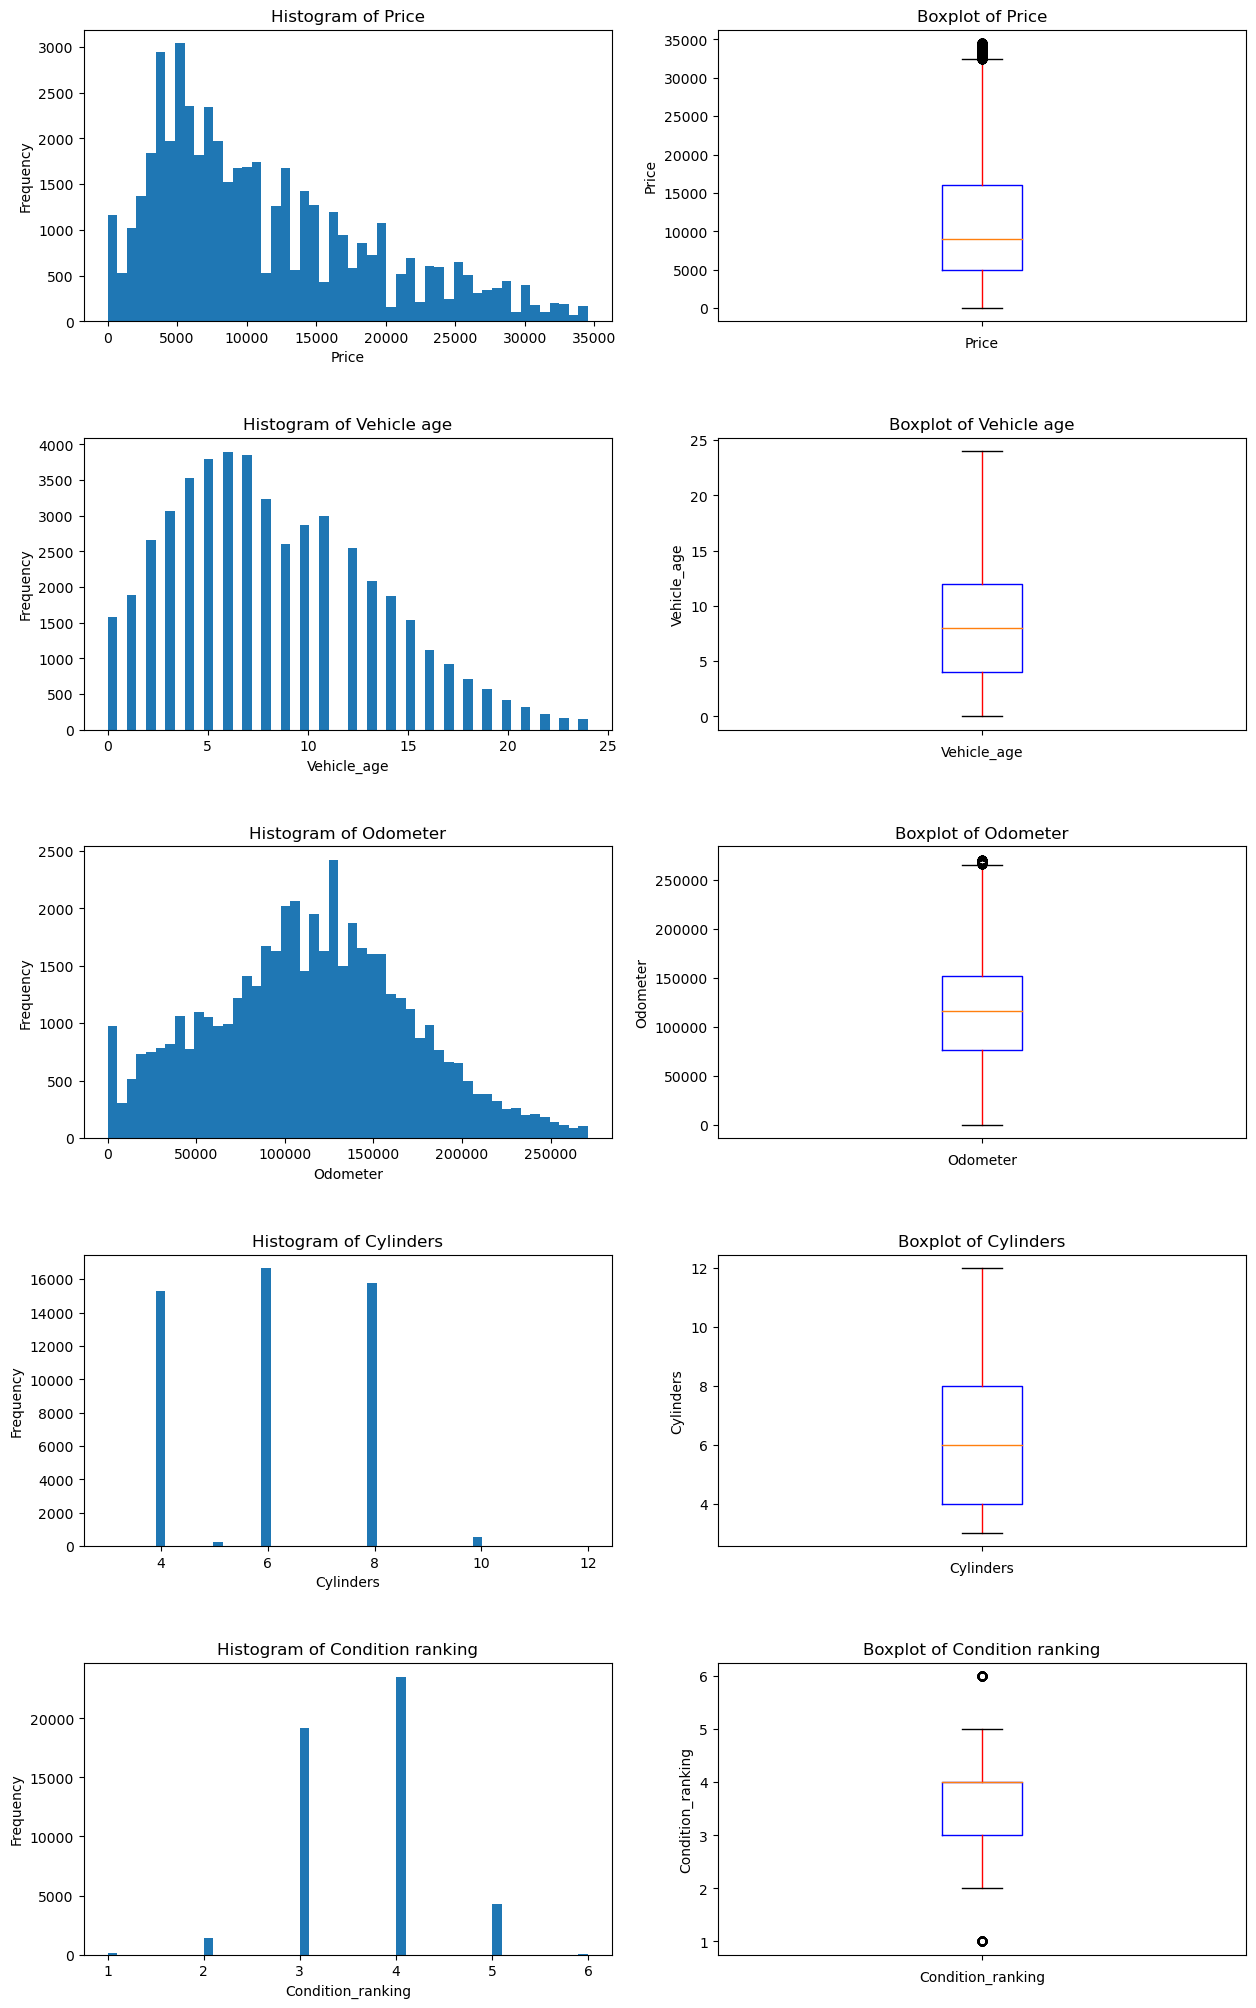

In [41]:
columns = ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition_ranking']

# Creo la matriz de gráficos
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, 25))

# Itero sobre las columnas y añado los gráficos a la matriz
for i, column in enumerate(columns):
    # Histograma en la primera columna
    axes[i, 0].hist(df_filtered[column], bins=50)
    axes[i, 0].set_xlabel(column.capitalize())
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].set_title(f"Histogram of {column.capitalize().replace('_',' ')}")

    # Gráfico de caja en la segunda columna
    axes[i, 1].boxplot(df_filtered[column], boxprops={'color':'blue'}, whiskerprops={'color':'red'})
    axes[i, 1].set_ylabel(column.capitalize())
    axes[i, 1].set_title(f"Boxplot of {column.capitalize().replace('_',' ')}")
    axes[i, 1].set_xticklabels([])
    axes[i, 1].set_xlabel(column.capitalize())

plt.subplots_adjust(hspace=0.4)


plt.show()

In [42]:
df_filtered.loc[:,['price','vehicle_age', 'odometer']].describe()

,price,vehicle_age,odometer
count,48538.000000,48538.000000,48538.000000
mean,11206.714718,8.263628,114797.708620
std,7820.472876,5.097384,55982.009053
min,1.000000,0.000000,0.000000
25%,4999.000000,4.000000,76285.750000
50%,8995.000000,8.000000,116100.000000
75%,15990.000000,12.000000,152201.500000
max,34555.000000,24.000000,271175.000000


- Con el dataset filtrado, se redujo la diferencia entre las medias y medianas pero se mantiene la forma de la distribución en todas las columnas. En `price`, `vehicle_age` y `odomemeter` la distribución sigue siendo ligeramente sesgada a la derecha y con colas de valores altos. Sin embargo, ya no se observa el elevado número de valores atípicos; en el grafico de caja de `vehicle_age` ni siquiera están presentes.
- Por su lado, los gráficos de `cylinders` y `condition_ranking` no presentan diferencias con respecto a los del dataset original.


## <a id='toc9_'></a>[Periodo de colocación de los anuncios](#toc0_)

A continuación se estudia el tiempo en que los anuncios estuvieron publicados. Para ello, se grafica la distribución de la columna `days_listed`.

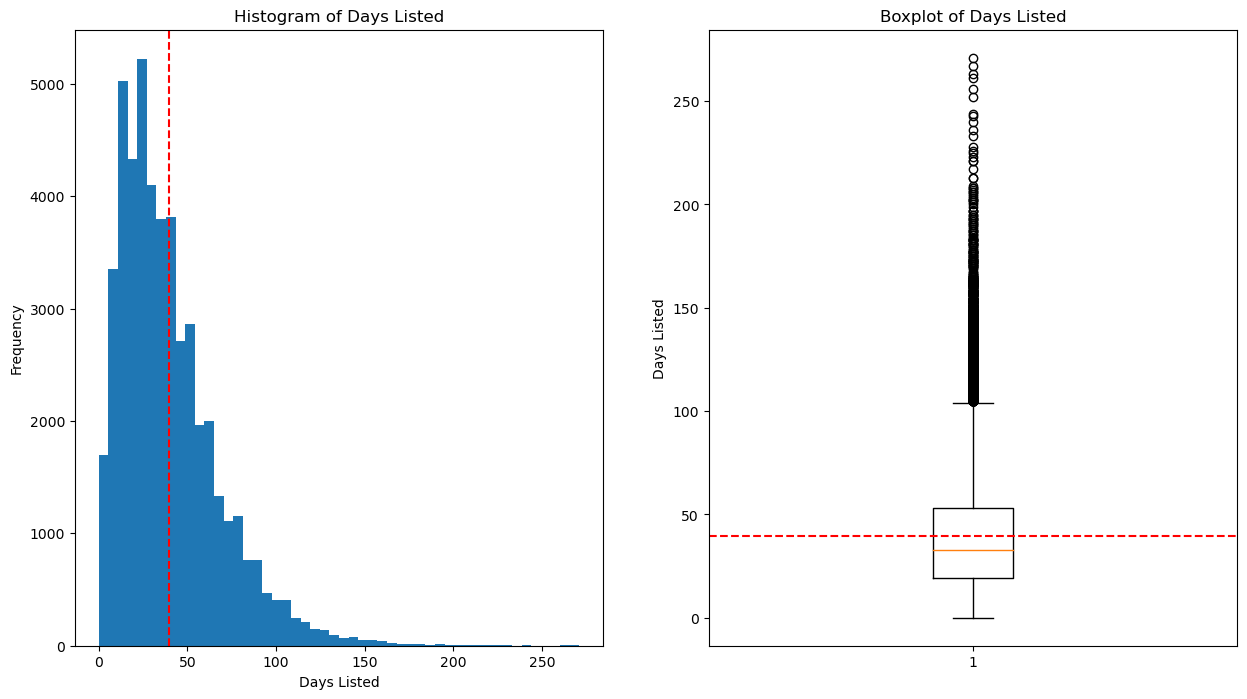

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axes[0].hist(df_filtered["days_listed"], bins=50)
axes[0].axvline(df['days_listed'].mean(), color='r', linestyle='--', label='xxx')
axes[0].set_xlabel("Days Listed")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Days Listed")


axes[1].boxplot(df_filtered["days_listed"])
axes[1].axhline(df['days_listed'].mean(), color='r', linestyle='--', label='xxx')
axes[1].set_ylabel("Days Listed")
axes[1].set_title("Boxplot of Days Listed")


plt.show()

In [44]:
df_filtered['days_listed'].describe()

count    48538.000000
mean        39.541473
std         28.213056
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

La media de `days_listed` es de 39 días y su mediana es de 33 días. Considerando el diagrama de caja, un anuncio típico dura entre 19 y 53 días. Si el anuncio duró menos de 19 días, considerando el primer cuartil, probablemente este fue eliminado muy rápido. Por otro lado, un anuncio de duración mayor a 100 días, según el extremo del bigote superior, podría considerarse anormalmente largo. 

## <a id='toc10_'></a>[Precio promedio por cada tipo de vehículo](#toc0_)

Se identifican los tipos de vehículos más populares y su precio promedio.

In [45]:
price_stat = df_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
price_stat.columns = ['ad_count', 'median_price']
price_stat = price_stat.sort_values(by='ad_count', ascending=False)
price_stat

,ad_count,median_price
type,,
sedan,12034,6969.549028
SUV,11936,10423.223777
truck,11162,15096.510482
pickup,6337,14994.104150
coupe,2031,13464.256032
wagon,1506,8975.517928
mini-van,1147,8046.564080
hatchback,1007,6838.923535
van,584,8820.914384


<AxesSubplot:title={'center':'Number of ads per type of vehicle'}, xlabel='type'>

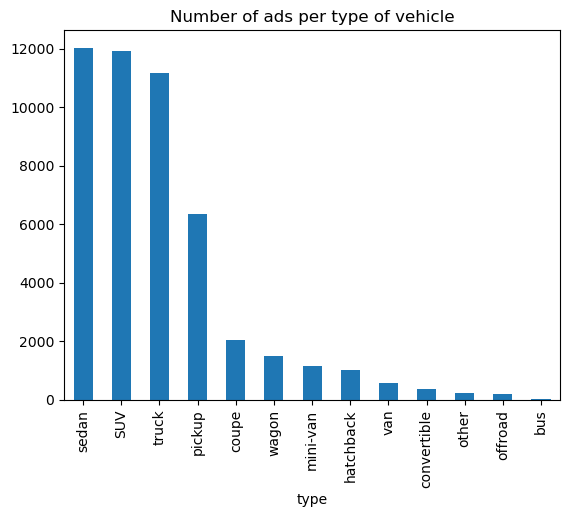

In [46]:
price_stat['ad_count'].plot(kind='bar', title='Number of ads per type of vehicle')

Los vehículos de tipo sedan y SUV son los que tienen el mayor número de anuncios. En cuanto al precio, los vehículos tipo truck y bus tienen el precio promedio más elevado, mientras que los tipo sedan y hatchback tienen el precio promedio más bajo.

## <a id='toc11_'></a>[Factores de precio](#toc0_)

Se busca identificar el factor que más impacta en el precio de los diferentes vehículos. Para ello, se estudiará las relaciones del precio con la edad, el millaje, la condición, el tipo de transmisión y el color para los tipos de vehículos más populares que se identificó antes, los SUV y los sedan. 
En el caso de las variables categóricas, tipo de transmisión y color, se considerarán en el análisis las categorías que tengan al menos 50 anuncios.

### <a id='toc11_1_'></a>[**`SUV`**](#toc0_)

In [47]:
# Se crea una matriz de correlación para los datos de los vehículos SUV
suv_data = df_filtered.query('type == "SUV"')
suv_data = suv_data[['price','vehicle_age', 'mean_mileage','condition_ranking','transmission','paint_color']]
suv_data.corr()

,price,vehicle_age,mean_mileage,condition_ranking
price,1.000000,-0.579405,0.260180,0.263790
vehicle_age,-0.579405,1.000000,-0.550906,-0.335533
mean_mileage,0.260180,-0.550906,1.000000,0.077542
condition_ranking,0.263790,-0.335533,0.077542,1.000000


<AxesSubplot:xlabel='condition_ranking', ylabel='price'>

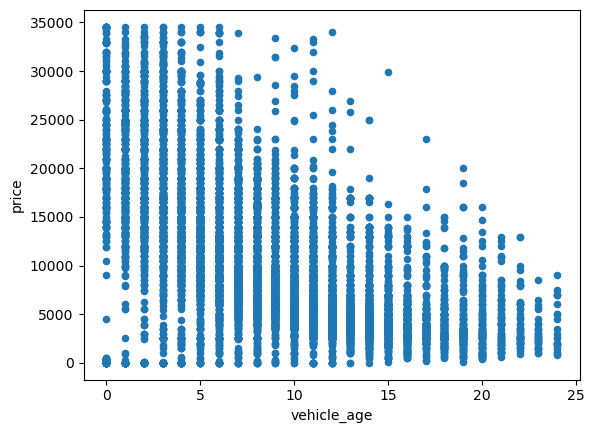

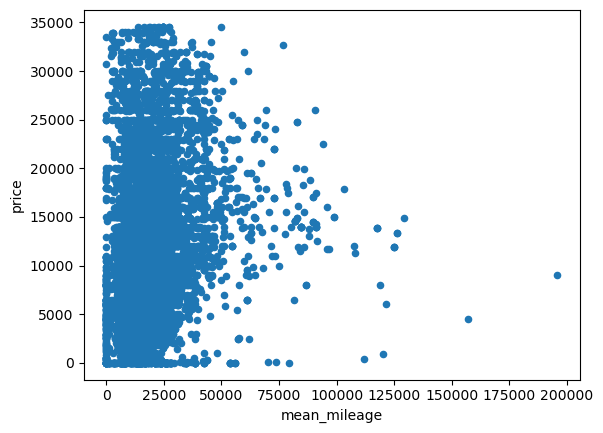

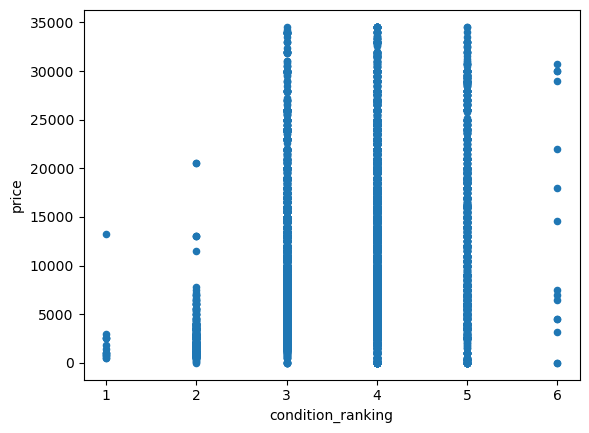

In [48]:
# Se grafica el precio contra la edad, el milaje anual y la condición
suv_data.plot(x='vehicle_age', y='price', kind='scatter')
suv_data.plot(x='mean_mileage', y='price', kind='scatter')
suv_data.plot(x='condition_ranking', y='price', kind='scatter')

Se encuentra que `vehicle_age` es la variable que más se relaciona con el precio. La correlación que existe es negativa, en el sentido de que a menor valor de `vehicle_age`, el precio será mayor. Por su lado, `mean_mileage` y `condition_ranking` presentan una correlación positiva que es más débil pero de similar magnitud entre ellas. 

Los gráficos de dispersión confirman la relación del precio con `vehicle_age` a pesar de que existe una alta variabilidad en los datos. En los gráficos de `mean_mileage` y `condition_ranking` no se identifica una relación clara con el precio.

Antes de continuar con los gráficos de caja de la variables categóricas, se identifican y se excluyen las categorías con menos de 50 anuncios.

In [49]:
# Se realiza un conteo de los anuncios por categoría de paint_color y transmission 
print(suv_data['paint_color'].value_counts())
suv_data['transmission'].value_counts()

unknown    2147
black      2103
white      1876
silver     1530
grey       1148
blue       1014
red         877
green       424
brown       353
custom      299
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64


automatic    11312
manual         465
other          159
Name: transmission, dtype: int64

In [50]:
# se filtran de suv_data las categorías de transmission y color que tienen al menos 50 anuncios.

trans_counts = suv_data['transmission'].value_counts()
color_counts = suv_data['paint_color'].value_counts()


trans_mask = suv_data['transmission'].isin(trans_counts[trans_counts >= 50].index)
color_mask = suv_data['paint_color'].isin(color_counts[color_counts >= 50].index)


suv_data = suv_data.loc[trans_mask & color_mask]


<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

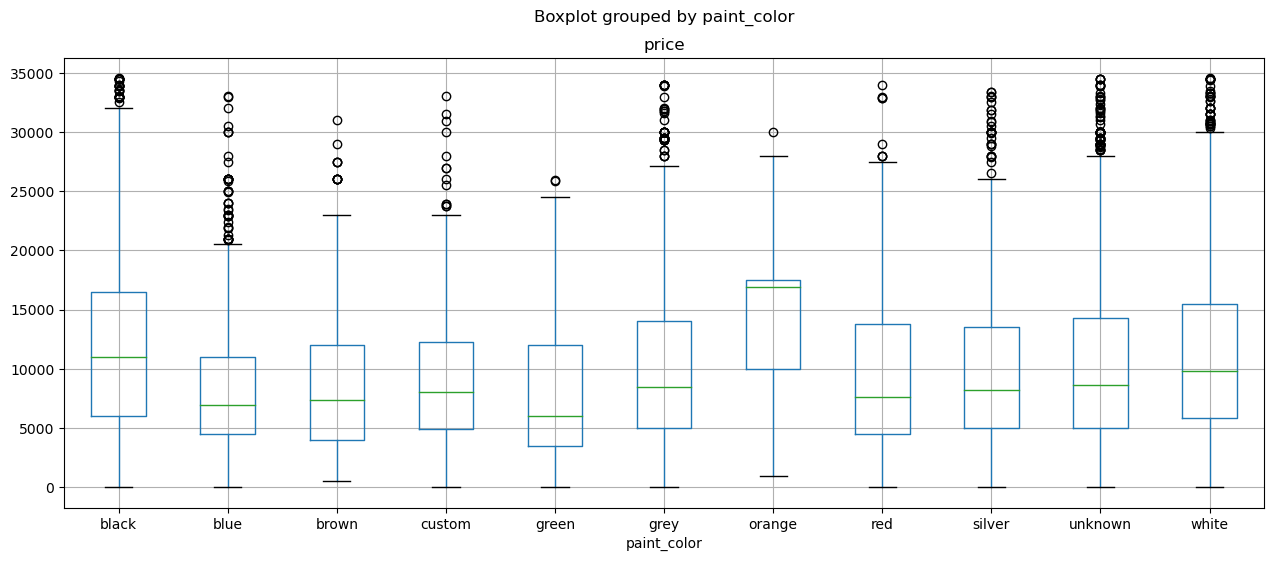

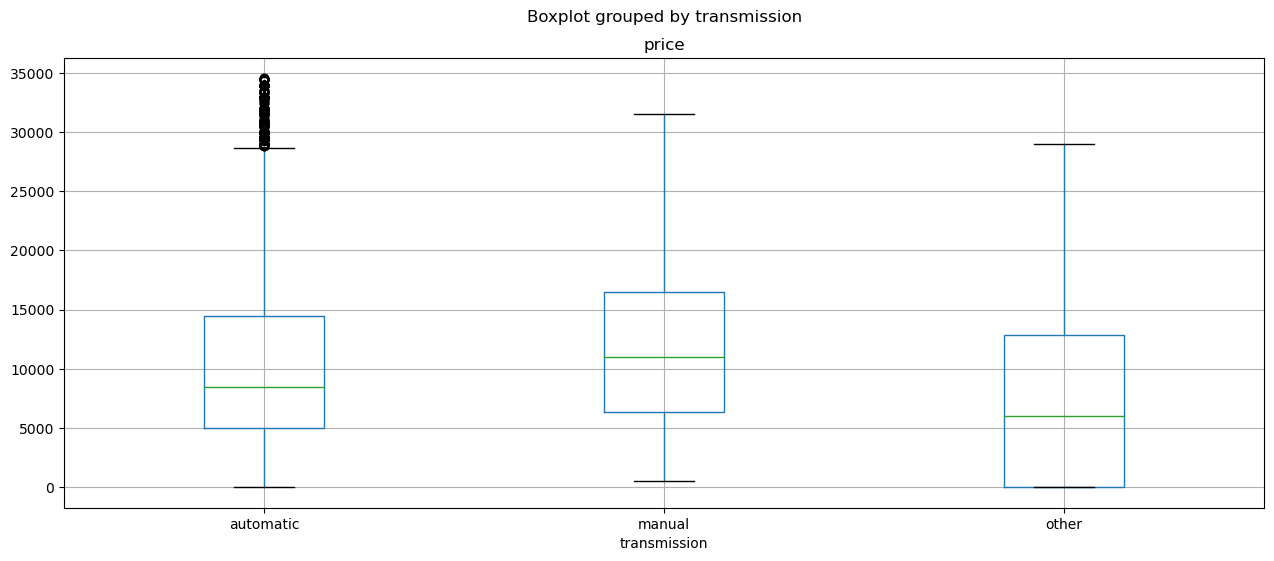

In [51]:
# Se generan boxplots del precio para cada categoría de paint_color y transmission
suv_data.boxplot(column='price', by='paint_color', figsize=(15,6))
suv_data.boxplot(column='price', by='transmission', figsize=(15,6))

El gráfico de `paint_color` muestra que los vehículos de color naranja tienen los precios típicos más altos y su mediana se encuentra por encima del rango de precios típicos del resto de colores, lo cual puede ser una diferencia importante. La mayoría del resto de colores tienen una mediana de precio muy similar. 

El gráfico de `transmission`, por su lado, indica precios típicos y una mediana más altos para los vehículos manuales.

### <a id='toc11_2_'></a>[**`sedan`**](#toc0_)

In [52]:
# Se crea una matriz de correlación para los datos de los vehículos SUV
sedan_data = df_filtered.query('type == "sedan"')
sedan_data = sedan_data[['price','vehicle_age', 'mean_mileage','condition_ranking','transmission','paint_color']]
sedan_data.corr()

,price,vehicle_age,mean_mileage,condition_ranking
price,1.000000,-0.619787,0.266682,0.293740
vehicle_age,-0.619787,1.000000,-0.526052,-0.317652
mean_mileage,0.266682,-0.526052,1.000000,0.069493
condition_ranking,0.293740,-0.317652,0.069493,1.000000


<AxesSubplot:xlabel='condition_ranking', ylabel='price'>

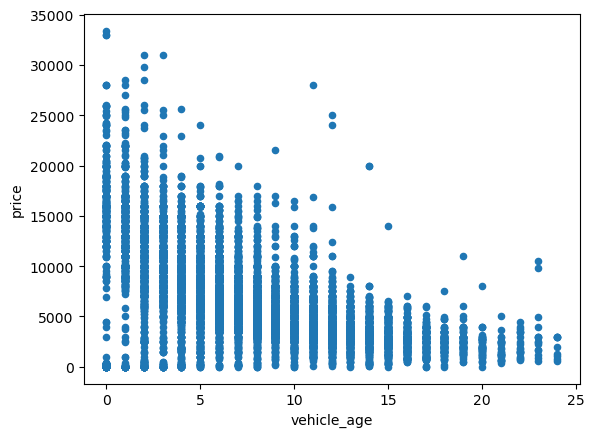

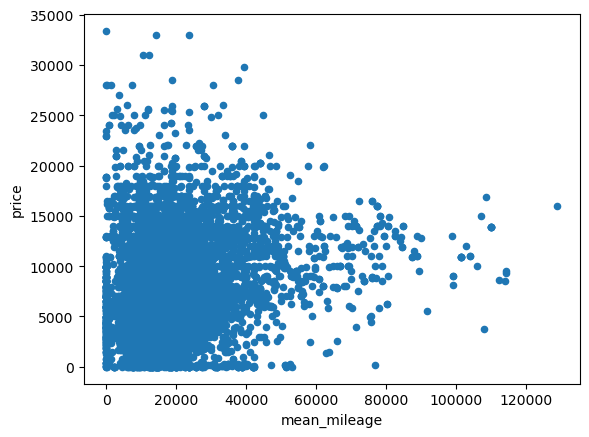

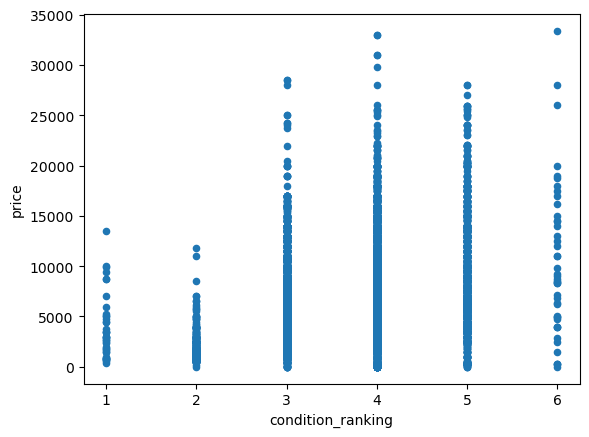

In [53]:
# Se grafica el precio contra la edad, el milaje anual y la condición
sedan_data.plot(x='vehicle_age', y='price', kind='scatter')
sedan_data.plot(x='mean_mileage', y='price', kind='scatter')
sedan_data.plot(x='condition_ranking', y='price', kind='scatter')

Nuevamente, `vehicle_age` es la variable que más se relaciona con el precio. La correlación también es negativa pero es más fuerte que en los SUV. En cambio, `mean_mileage` y `condition_ranking` también presentan una correlación positiva más débil pero de similar magnitud entre ellas. 

Los gráficos de dispersión también confirman la relación del precio con `vehicle_age` a pesar de la alta variabilidad en los datos. En los gráficos de `mean_mileage` y `condition_ranking` se sigue sin identificar ninguna relación con el precio.

In [54]:
# Se realiza un conteo de los anuncios por categoría de paint_color y transmission 
print(sedan_data['paint_color'].value_counts())
sedan_data['transmission'].value_counts()

unknown    2167
silver     2037
black      1758
grey       1611
white      1493
blue       1221
red         936
custom      297
brown       257
green       203
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64


automatic    11325
manual         577
other          132
Name: transmission, dtype: int64

In [55]:
# se filtran de sedan_data las categorías de transmission y color que tienen al menos 50 anuncios.

trans_counts = sedan_data['transmission'].value_counts()
color_counts = sedan_data['paint_color'].value_counts()

trans_mask = sedan_data['transmission'].isin(trans_counts[trans_counts >= 50].index)
color_mask = sedan_data['paint_color'].isin(color_counts[color_counts >= 50].index)

sedan_data = sedan_data.loc[trans_mask & color_mask]


<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

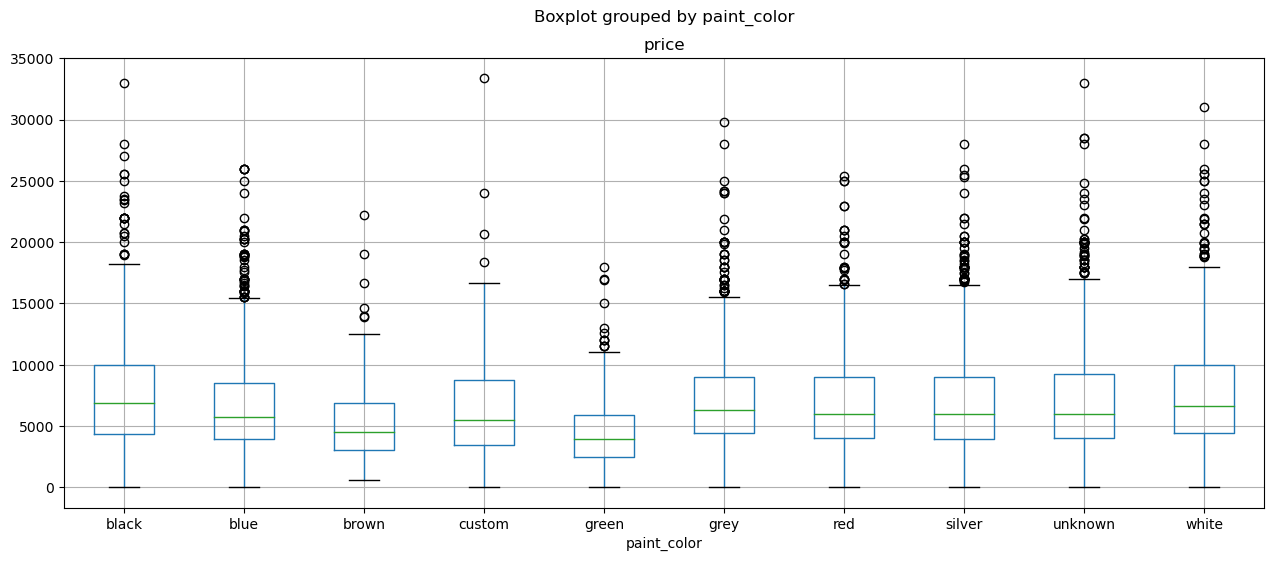

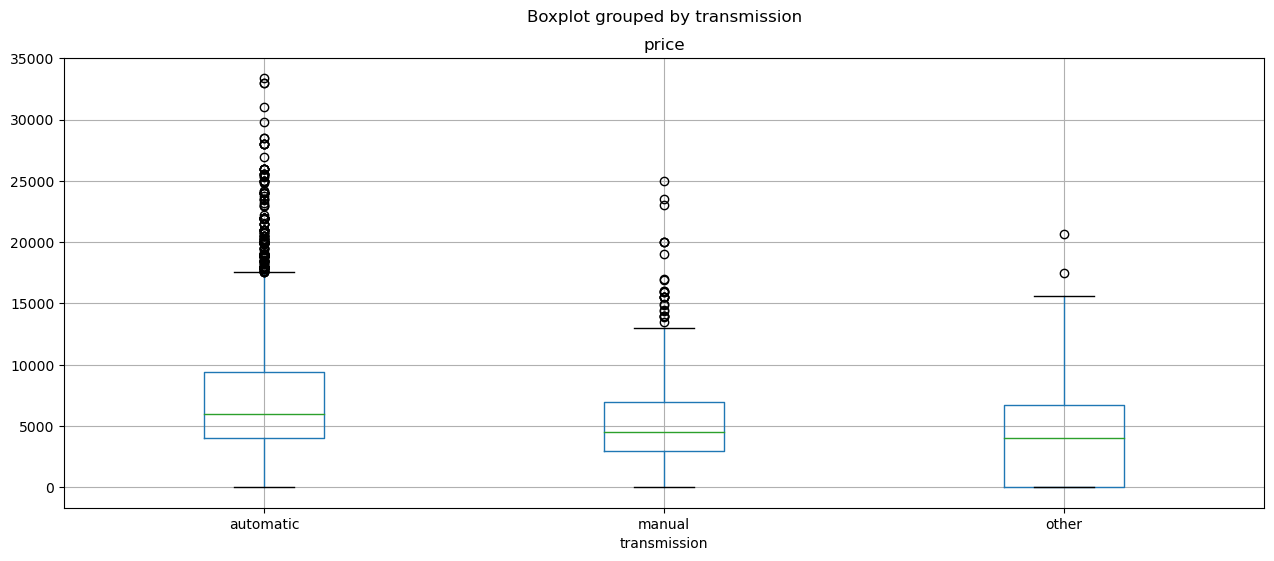

In [56]:
# Se generan boxplots del precio para cada categoría de paint_color y transmission
sedan_data.boxplot(column='price', by='paint_color', figsize=(15,6))
sedan_data.boxplot(column='price', by='transmission', figsize=(15,6))


Dentro de las categorías válidas, no se observa una categoría cuyos precios sean especialmente altos con respecto al resto. Varias cateogrías comparten rangos de precios altos muy similares: negro, gris, rojo, plateado, desconocido y blanco. En cambio, la categoría de los vehículos verdes tiene los precios típicos más bajos y su mediana también está por debajo del resto. Finalmente, la mediana de precios es más alta y los precios son más variados en los vehículos automáticos.

## <a id='toc12_'></a>[Conclusión general](#toc0_)

Durante el análisis de datos, se descubrieron distribuciones asimétricas positivas en las variables de precio, edad del vehículo y millaje, así como una alta variabilidad y presencia de valores extremos altos. Al filtrar el conjunto de datos para excluir los valores extremos, se redujo la diferencia entre las medias y medianas pero se mantuvo la forma de las distribuciones. Las distribuciones del número de cilindros y la condición se mantuvo igual luego del filtro.

Se estudió el período de colocación de los anuncios y se concluyó que un anuncio típico dura entre 19 y 53 días. Si el anuncio duró menos de 19 días, probablemente fue eliminado muy rápido. Por otro lado, un anuncio de duración mayor a 100 días podría considerarse anormalmente largo.

Además, se encontró que los vehículos sedan y SUV tienen el mayor número de anuncios. En cuanto al precio promedio por tipo de vehículo, los vehículos tipo truck y bus tienen el precio más elevado, mientras que los tipo sedan y hatchback tienen el precio más bajo.

En el análisis de los factores que influyen en el precio, se puede decir que la variable de edad del vehículo tiene la mayor relación con el precio en los vehículos sedan y SUV, siendo esta una correlación negativa cercana a -0.6. La relación del precio con el millaje y la condición muestra ser mucho más débil.

Por otro lado, el color naranja tiene la mediana de precios más alta entre los vehículos SUV, con una diferencia que puede ser importante. También se encontró que la mediana de precios es más alta en los vehículos con transmisión manual. En los vehículos sedan, no se identificó un color con precios especialmente altos, ya que varios tienen rangos de precios muy similares. Sin embargo, el color verde tiene los precios típicos más bajos y su mediana también está por debajo del resto. También se observaron precios más variados y una mediana de precio ligeramente más alta en los vehículos automáticos tipo sedan.